# Section 1: Import Thư viện

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Section 2: Đọc dataset và khảo sát

In [78]:
df_business = pd.read_csv('/content/business_train.csv')
df_finance = pd.read_csv('/content/finance_train.csv')
df_price = pd.read_csv('/content/price_train.csv')

print('Business Train Shape: ', df_business.shape, '; Total symbols: ', len(df_business['symbol'].unique()))
print('Finance Train Shape: ', df_finance.shape, '; Total symbols: ', len(df_finance['symbol'].unique()))
print('Price Train Shape: ', df_price.shape, '; Total symbols: ', len(df_price['symbol'].unique()))

Business Train Shape:  (823, 5) ; Total symbols:  30
Finance Train Shape:  (3421, 5) ; Total symbols:  30
Price Train Shape:  (6149, 7) ; Total symbols:  30


In [26]:
df_business.head(5)

,index,2021-09,2021-06,2021-03,symbol
0,Chi phí lãi và các khoản chi phí tương tự,4.427780e+12,4.548970e+12,4.646480e+12,STB
1,Thu nhập lãi thuần,3.313030e+12,3.148210e+12,3.008360e+12,STB
2,Thu nhập từ hoạt động dịch vụ,1.062330e+12,1.478290e+12,1.335610e+12,STB
3,Chi phí hoạt động dịch vụ,4.724920e+11,5.419750e+11,4.982040e+11,STB
4,Thu nhập thuần từ hoạt động dịch vụ,5.898330e+11,9.363180e+11,8.374090e+11,STB


In [28]:
df_finance.head(5)

,index,2021-06,2021-03,2021-09,symbol
0,"Tiền mặt, vàng bạc, đá quí",9907548000000,9.120193e+12,NaN,STB
1,Tiền gửi tại NHNN,11367139000000,1.189670e+13,NaN,STB
2,"Tiền, vàng gửi tại các TCTD khác và cho vay cá...",13541640000000,8.631605e+12,NaN,STB
3,Tiền gửi tại các TCTD khác,12944363000000,7.773374e+12,NaN,STB
4,Cho vay các TCTD khác,704970000000,8.582310e+11,NaN,STB


In [29]:
df_price.head(5)

,date,open,high,low,close,volume,symbol
0,2021-01-04,17.05,17.70,16.90,17.55,46809600,STB
1,2021-01-05,17.55,17.95,17.45,17.70,23399500,STB
2,2021-01-06,17.90,18.35,17.70,18.00,32553600,STB
3,2021-01-07,18.05,18.45,17.85,18.45,40903700,STB
4,2021-01-08,18.80,19.50,18.65,19.40,36089200,STB



***Tách Dataframe lớn thành Dataframe nhỏ dựa theo mã chứng khoán***

In [30]:
# Group các thông tin của một mã chứng khoán lại thành từng df khác nhau và gán vào dictionary
# với key là mã chứng khoán
df_business_group_by_symbol = dict(tuple(df_business.groupby('symbol')))
df_finance_group_by_symbol = dict(tuple(df_finance.groupby('symbol')))
df_price_group_by_symbol = dict(tuple(df_price.groupby('symbol')))

In [32]:
# Lấy danh sách các mã chứng khoán
symbol_list = df_price["symbol"].unique().tolist()

In [33]:
symbol_list

['STB',
 'SSI',
 'TCB',
 'VPB',
 'HPG',
 'MBB',
 'POW',
 'CTG',
 'TCH',
 'HDB',
 'VHM',
 'VRE',
 'VIC',
 'SBT',
 'NVL',
 'PDR',
 'BID',
 'VNM',
 'PLX',
 'TPB',
 'MWG',
 'FPT',
 'PNJ',
 'MSN',
 'KDH',
 'GAS',
 'BVH',
 'VJC',
 'VCB',
 'REE']

In [17]:
# Some functions to help out with
def return_rmse(test,predicted):
  rmse = math.sqrt(mean_squared_error(test, predicted))
  print("The root mean squared error is {}.".format(rmse))


***Split Dataset thành 2 tập train và validation***

In [ ]:
def split(dataframe, col):
  length_data = len(dataframe)     # rows that data has
  split_ratio = 0.8           # %80 train + %20 validation
  length_train = round(length_data * split_ratio)  
  length_validation = length_data - length_train

  print("Data length :", length_data)
  print("Train data length :", length_train)
  print("Validation data lenth :", length_validation)
  
  return dataframe.loc[:length_train, col], dataframe.loc[length_train:,col]

df_new = {}
for symbol in symbol_list:
  df_new[symbol] = {}

  print("---------------------------")
  print("Split Stock {0}".format(symbol))

  # Reset Index để những DF đã được group theo mã chứng khoán
  # Không bị nhảy index và index bắt đầu lại từ 0
  df_price_group_by_symbol[symbol] = df_price_group_by_symbol[symbol].reset_index()

  # Tách df thành 2 tập train và set
  df_new[symbol]["Train"], df_new[symbol]["Test"] = split(df_price_group_by_symbol[symbol], "close")

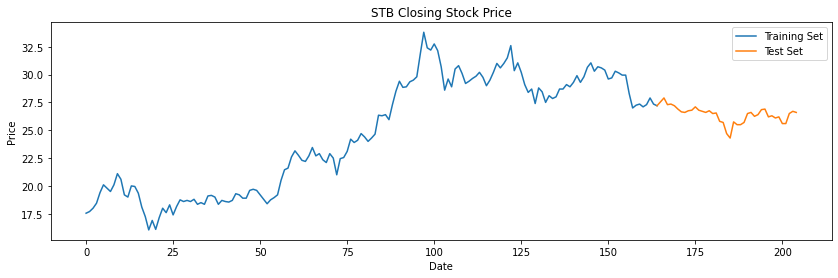

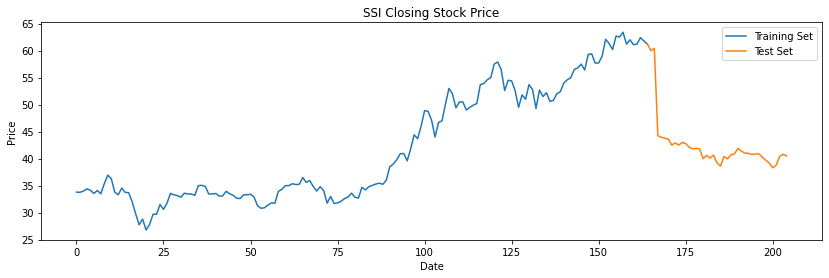

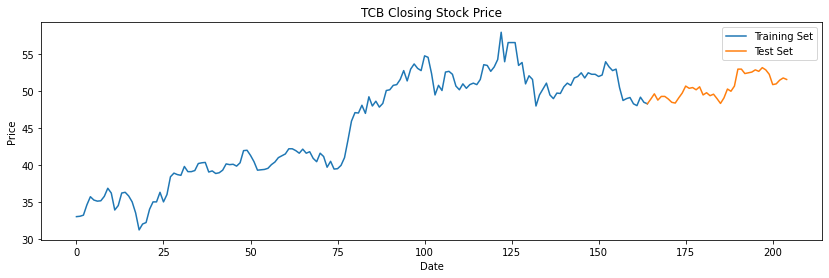

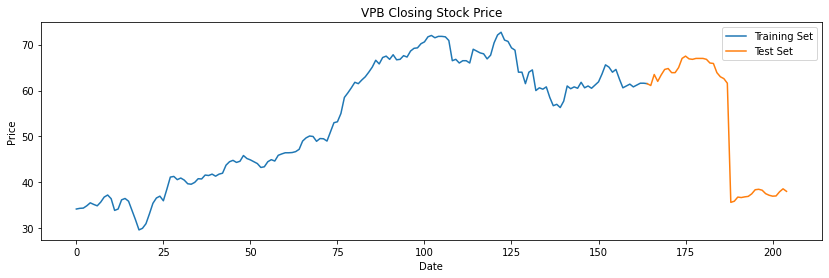

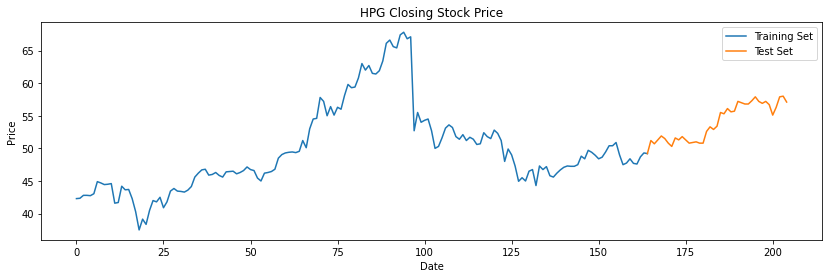

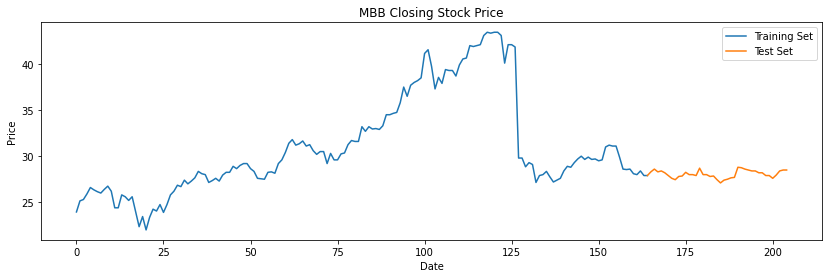

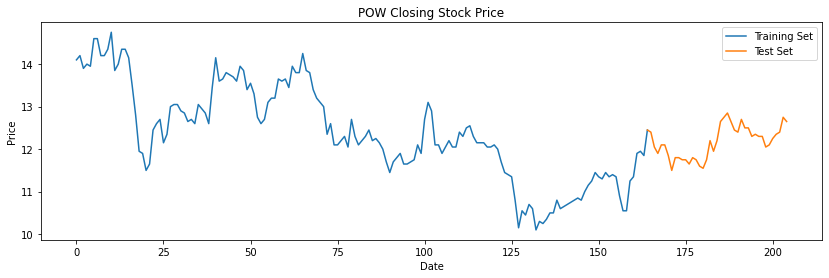

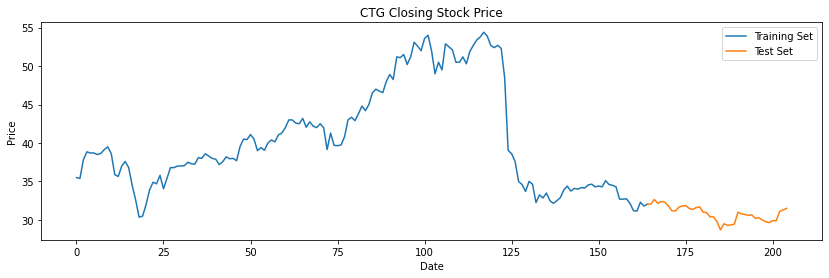

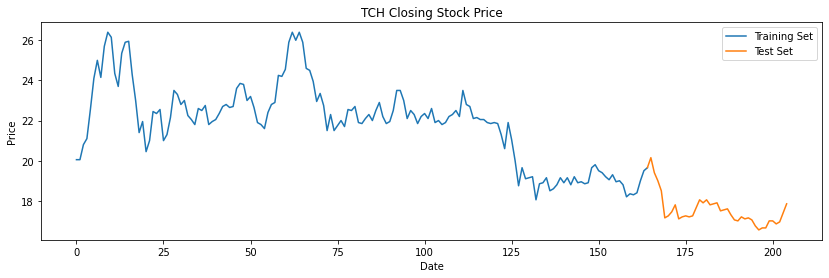

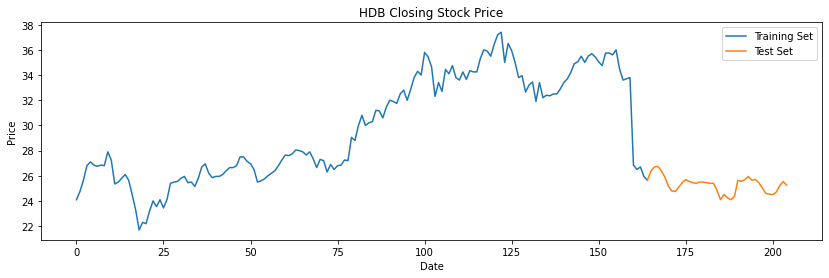

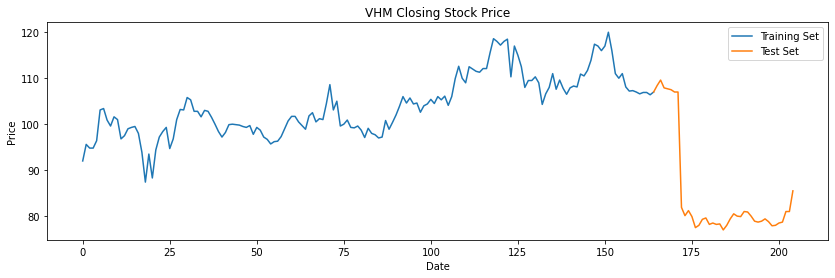

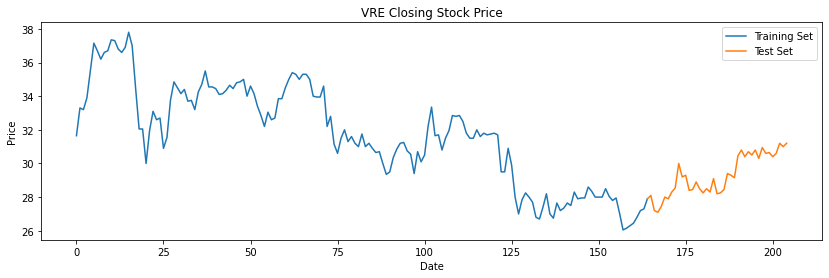

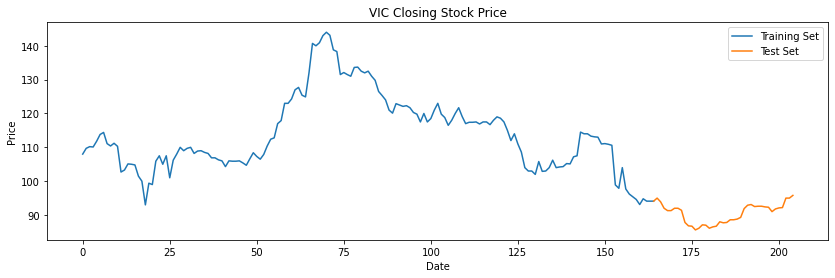

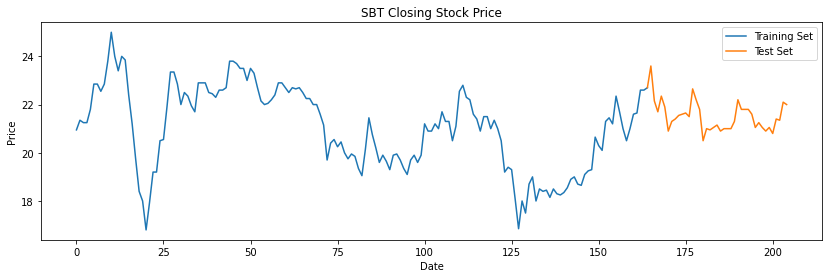

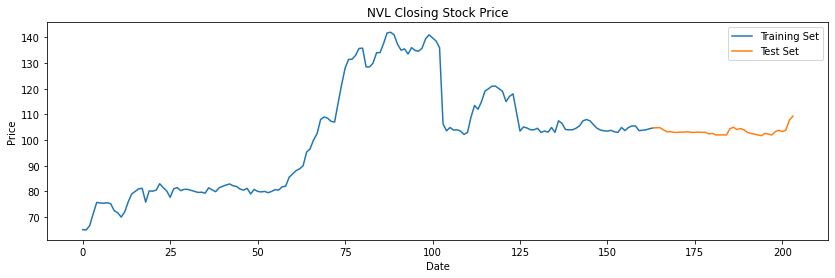

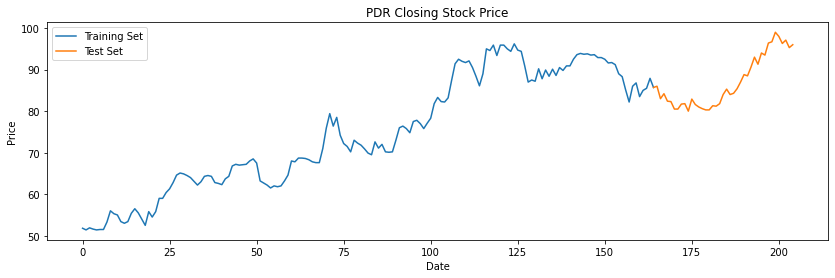

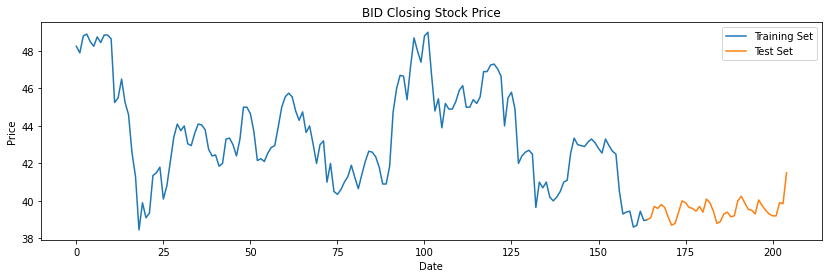

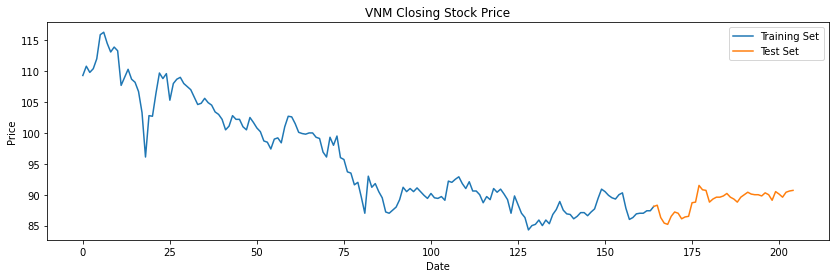

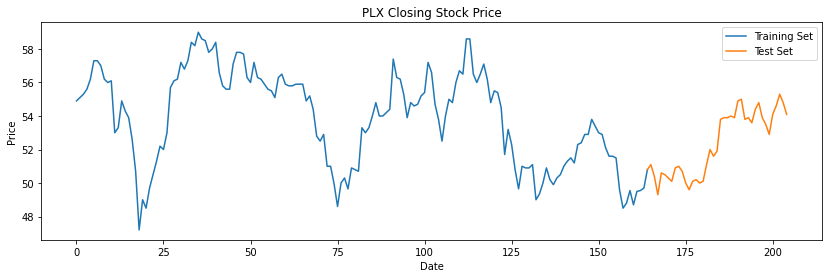

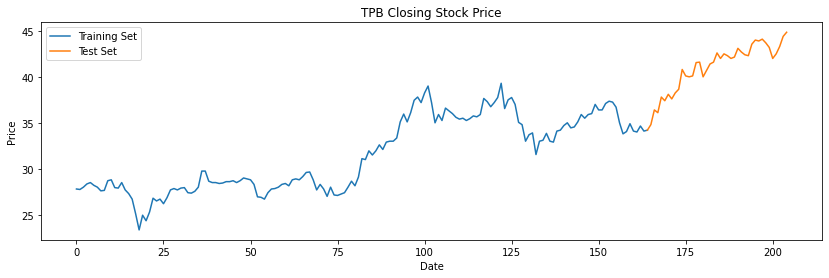

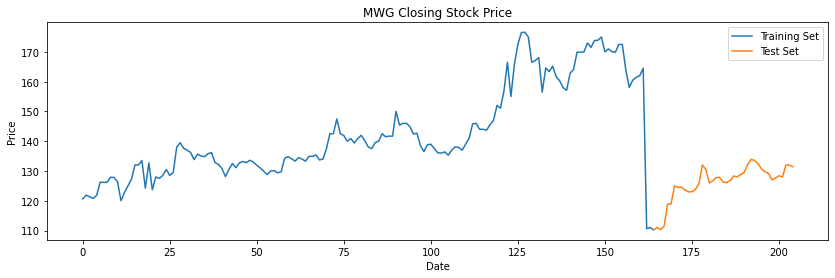

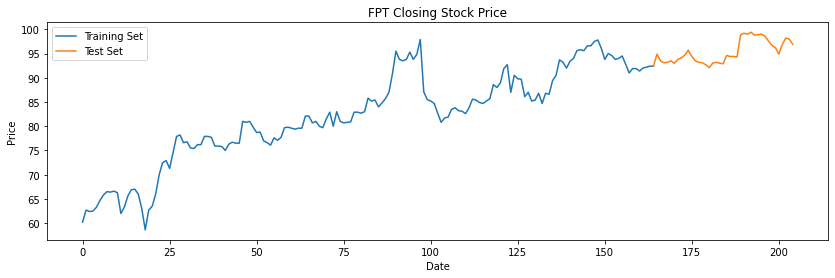

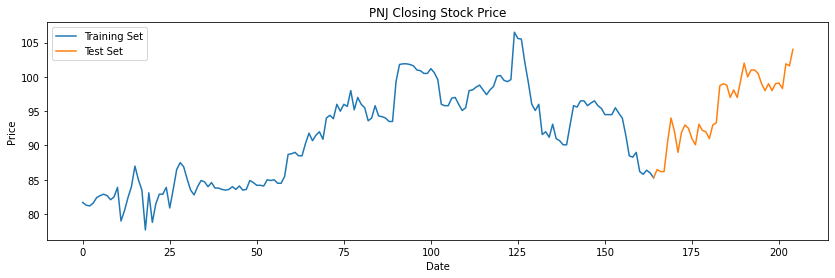

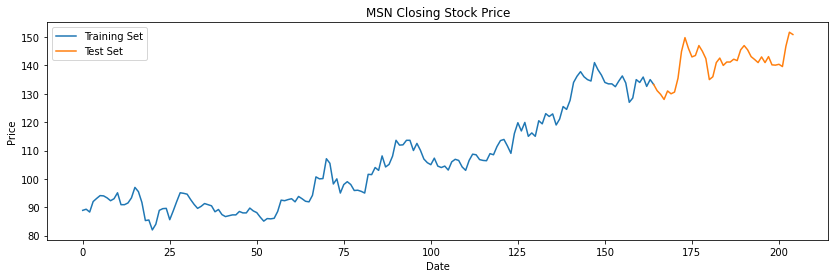

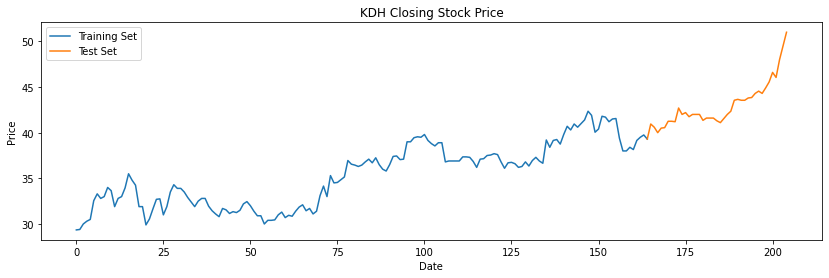

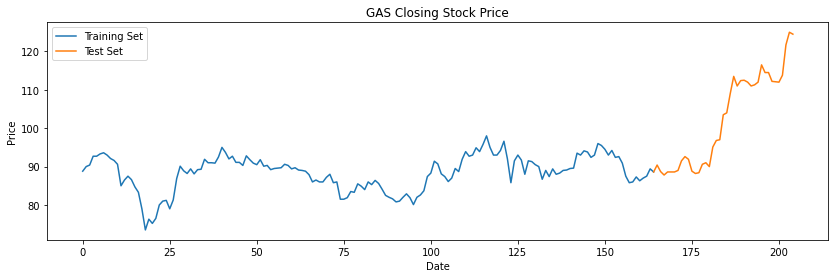

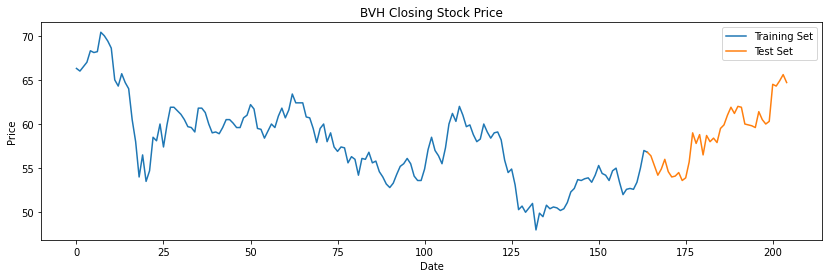

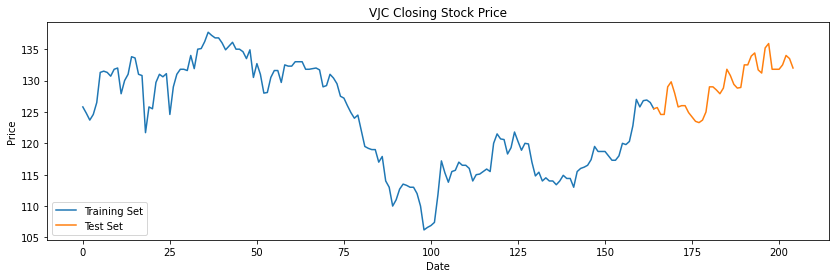

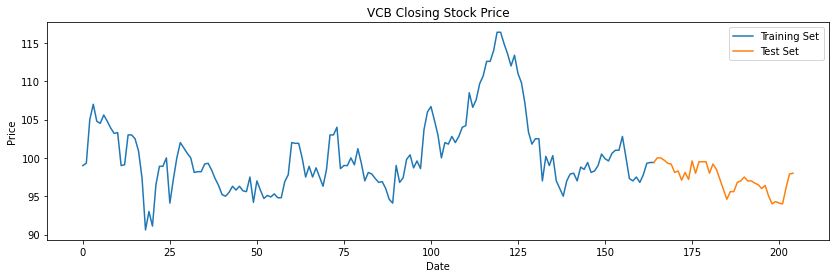

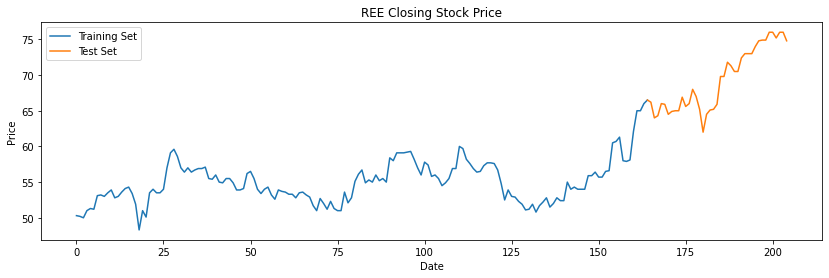

In [49]:
for i in symbol_list:
  plt.figure(figsize=(14,4))
  plt.plot(df_new[i]["Train"])
  plt.plot(df_new[i]["Test"])

  plt.ylabel("Price")
  plt.xlabel("Date")
  
  plt.legend(["Training Set", "Test Set"])
  plt.title(i + " Closing Stock Price")

# Scale Dữ liệu và Xây dựng Model

In [69]:
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout, GRU, Bidirectional
from keras.optimizers import SGD

In [50]:
# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(symbol_list):
  sc = MinMaxScaler(feature_range=(0,1))

  a_train = np.array(df_new[i]["Train"])
  a_test = np.array(df_new[i]["Test"])

  # Truyển np.array(thành dạng cột)
  a_train = a_train.reshape(a_train.shape[0], 1)
  a_test = a_test.reshape(a_test.shape[0], 1)
  
  # transform dữ liệu
  transform_train[i] = sc.fit_transform(a_train)
  transform_test[i] = sc.fit_transform(a_test)

  # Giữ lại sc để 
  # scaling back từ 0-1 về nguyên mẫu
  scaler[i] = sc

In [51]:
for symbol in transform_train.keys():
  print(symbol, transform_train[i].shape)

print("\n")    

for symbol in transform_test.keys():
  print(symbol, transform_test[i].shape)

STB (165, 1)
SSI (165, 1)
TCB (165, 1)
VPB (165, 1)
HPG (165, 1)
MBB (165, 1)
POW (165, 1)
CTG (165, 1)
TCH (165, 1)
HDB (165, 1)
VHM (165, 1)
VRE (165, 1)
VIC (165, 1)
SBT (165, 1)
NVL (165, 1)
PDR (165, 1)
BID (165, 1)
VNM (165, 1)
PLX (165, 1)
TPB (165, 1)
MWG (165, 1)
FPT (165, 1)
PNJ (165, 1)
MSN (165, 1)
KDH (165, 1)
GAS (165, 1)
BVH (165, 1)
VJC (165, 1)
VCB (165, 1)
REE (165, 1)


STB (41, 1)
SSI (41, 1)
TCB (41, 1)
VPB (41, 1)
HPG (41, 1)
MBB (41, 1)
POW (41, 1)
CTG (41, 1)
TCH (41, 1)
HDB (41, 1)
VHM (41, 1)
VRE (41, 1)
VIC (41, 1)
SBT (41, 1)
NVL (41, 1)
PDR (41, 1)
BID (41, 1)
VNM (41, 1)
PLX (41, 1)
TPB (41, 1)
MWG (41, 1)
FPT (41, 1)
PNJ (41, 1)
MSN (41, 1)
KDH (41, 1)
GAS (41, 1)
BVH (41, 1)
VJC (41, 1)
VCB (41, 1)
REE (41, 1)


Chúng ta sẽ dự đoán giá chứng khoán trong tương lai

Vì vậy, với tập train hiện tại với mỗi mã chứng khoán ta có 165 dòng dữ liệu đại diện cho 165 ngày.

Mục tiêu hiện tại chúng ta là dự đoán giá close của ngày tiếp theo.

Chúng ta sử dụng time step là 14 ngày.

Chúng ta sẽ lấy 14 ngày close đầu tiên (0 to 14), 14 giá đóng đầu tiên sẽ nằm trong tập X_train

Sau đó ta sẽ predict ngày thứ 15; và giá cổ phiếu ngày thứ 15 sẽ nằm trong tập y_train

Tiếp túc, ta chọn dữ liệu từ ngày 1 đến 15, những dữ liệu này sẽ nằm trong tập X_train

Sau đó ta sẽ predict ngày thứ 16, và giá cổ phiếu ngày thứ 16 sẽ nằm trong tập y_train

In [63]:
trainset = {}
testset = {}

step = 14
train_size = 164
test_size = 41
for symbol in symbol_list:
  trainset[symbol] = {}

  X_train = []
  y_train = []

  # Tách dữ liệu thành tập train theo từng step với mỗi step là 14 ngày
  for i in range(step, train_size):
      X_train.append(transform_train[symbol][i-step:i,0])
      y_train.append(transform_train[symbol][i,0])

  X_train, y_train = np.array(X_train), np.array(y_train)

  # Reshape dữ liệu
  trainset[symbol]["X"] = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  trainset[symbol]["y"] = y_train
  
  testset[symbol] = {}

  X_test = []
  y_test = []    

  for i in range(step, test_size):
      X_test.append(transform_test[symbol][i-step:i,0])
      y_test.append(transform_test[symbol][i,0])

  X_test, y_test = np.array(X_test), np.array(y_test)

  testset[symbol]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
  testset[symbol]["y"] = y_test

In [86]:
arr_buff = []
# Chuyển các tập Train và Set vào DF để hiển thị dễ nhìn
for i in symbol_list:
  buff = {}
  buff["X_train"] = trainset[i]["X"].shape
  buff["y_train"] = trainset[i]["y"].shape
  buff["X_test"] = testset[i]["X"].shape
  buff["y_test"] = testset[i]["y"].shape
  arr_buff.append(buff)

pd.DataFrame(arr_buff, index=symbol_list)

,X_train,y_train,X_test,y_test
STB,"(150, 14, 1)","(150,)","(27, 14, 1)","(27,)"
SSI,"(150, 14, 1)","(150,)","(27, 14, 1)","(27,)"
TCB,"(150, 14, 1)","(150,)","(27, 14, 1)","(27,)"
VPB,"(150, 14, 1)","(150,)","(27, 14, 1)","(27,)"
HPG,"(150, 14, 1)","(150,)","(27, 14, 1)","(27,)"
MBB,"(150, 14, 1)","(150,)","(27, 14, 1)","(27,)"
POW,"(150, 14, 1)","(150,)","(27, 14, 1)","(27,)"
CTG,"(150, 14, 1)","(150,)","(27, 14, 1)","(27,)"
TCH,"(150, 14, 1)","(150,)","(27, 14, 1)","(27,)"
HDB,"(150, 14, 1)","(150,)","(27, 14, 1)","(27,)"


Shape của X_train : 150 x 14 x 1
Có nghĩa là chúng ta có 1134 rows, mỗi row có 14 rows (14 ngày) và 1 column
Kiểm tra rows đầu tiên ta có: 14 rows (giá cổ phiếu của 13 ngày)

# Xây dựng Mô hình RNN

In [72]:
%%time
regressor = Sequential()

regressor.add(SimpleRNN(units= 50, return_sequences = True, 
                        input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Second RNN layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third RNN layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth RNN layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))

regressor.add(Dense(units= 1))

regressor.compile(optimizer= 'adam', loss='mean_squared_error')

# Fitting to the training set
for i in symbol_list:
  print("Fitting to", i)
  regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=10, batch_size=200)

Fitting to STB
Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.2897
Epoch 2/10
1/1 [==============================] - 0s 55ms/step - loss: 0.1723
Epoch 3/10
1/1 [==============================] - 0s 51ms/step - loss: 0.0882
Epoch 4/10
1/1 [==============================] - 0s 51ms/step - loss: 0.0439
Epoch 5/10
1/1 [==============================] - 0s 61ms/step - loss: 0.0501
Epoch 6/10
1/1 [==============================] - 0s 52ms/step - loss: 0.0708
Epoch 7/10
1/1 [==============================] - 0s 57ms/step - loss: 0.0726
Epoch 8/10
1/1 [==============================] - 0s 48ms/step - loss: 0.0452
Epoch 9/10
1/1 [==============================] - 0s 48ms/step - loss: 0.0381
Epoch 10/10
1/1 [==============================] - 0s 51ms/step - loss: 0.0365
Fitting to SSI
Epoch 1/10
1/1 [==============================] - 0s 52ms/step - loss: 0.0353
Epoch 2/10
1/1 [==============================] - 0s 48ms/step - loss: 0.0368
Epoch 3/10
1/1 [===================

# Predict trên mô hình RNN

1/1 [==============================] - 0s 18ms/step


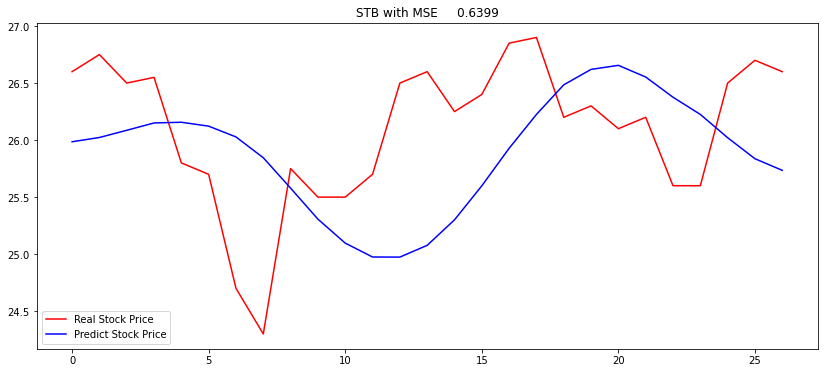

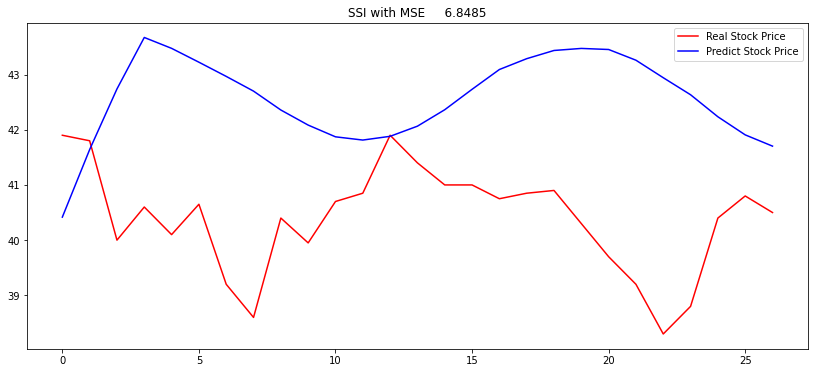

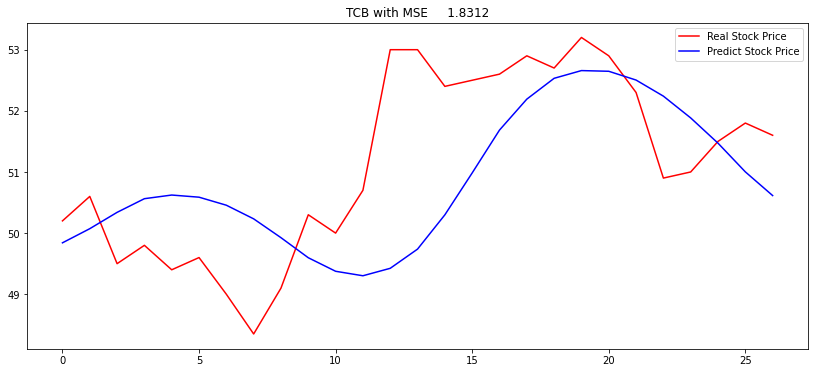

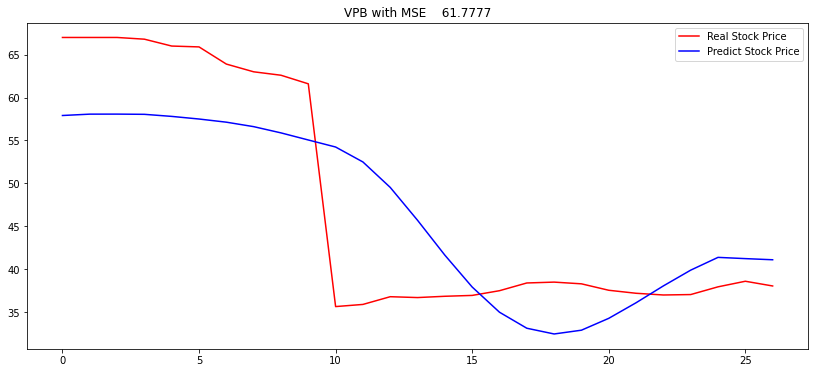

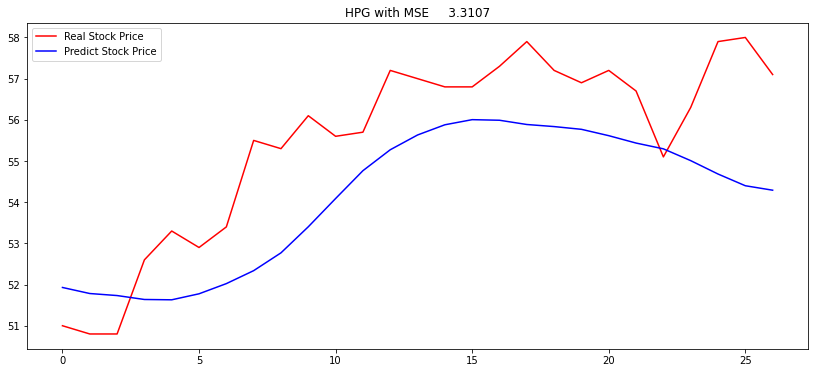

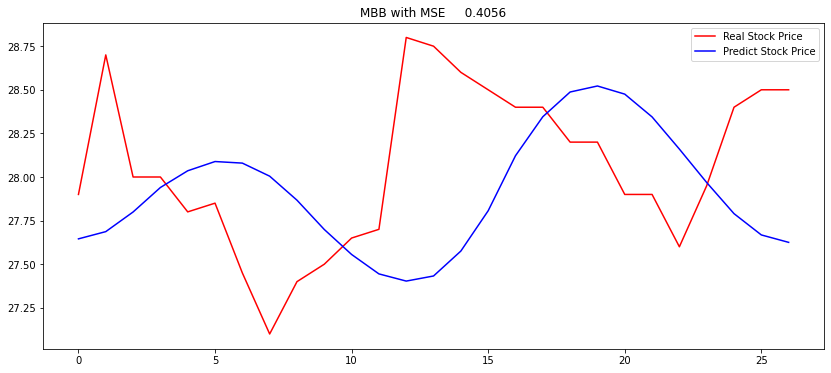

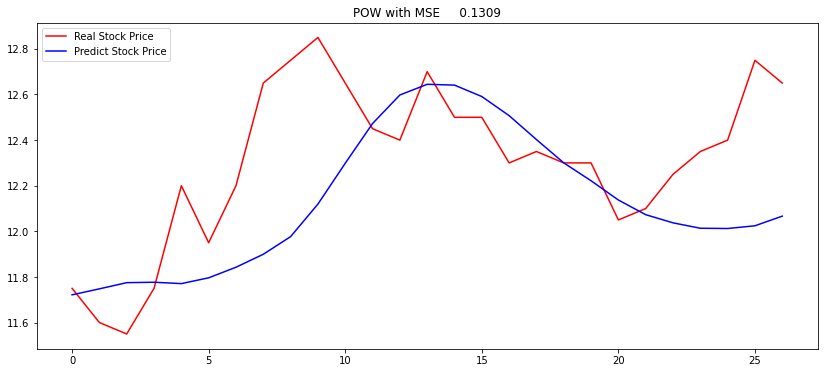

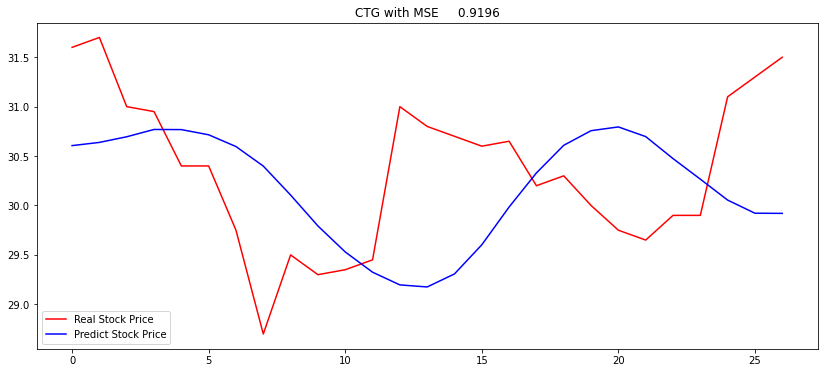

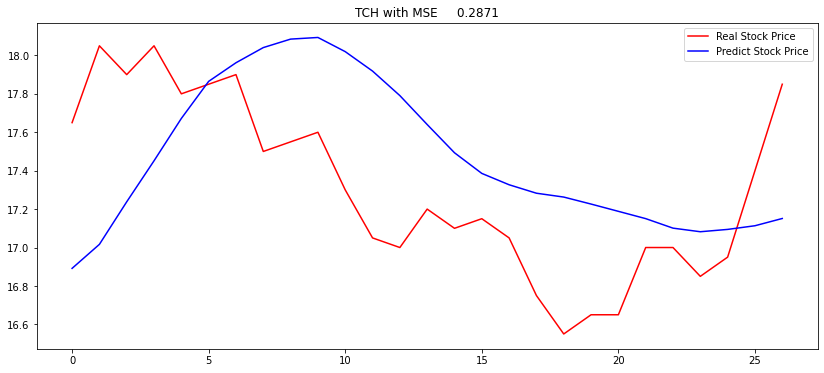

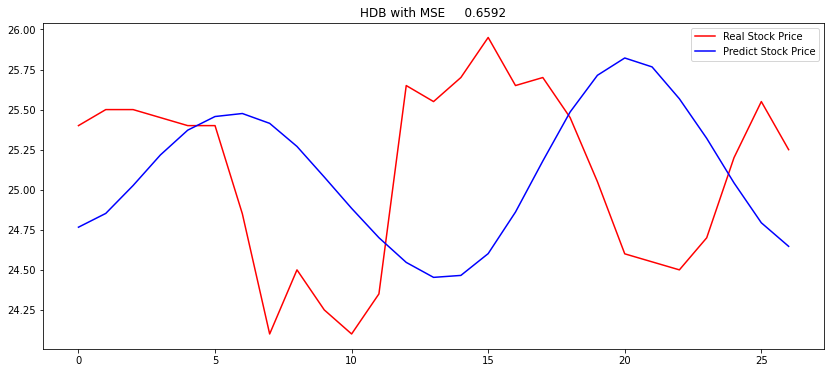

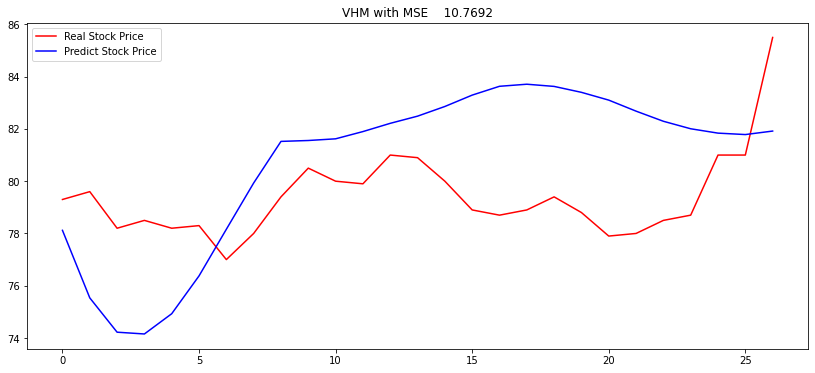

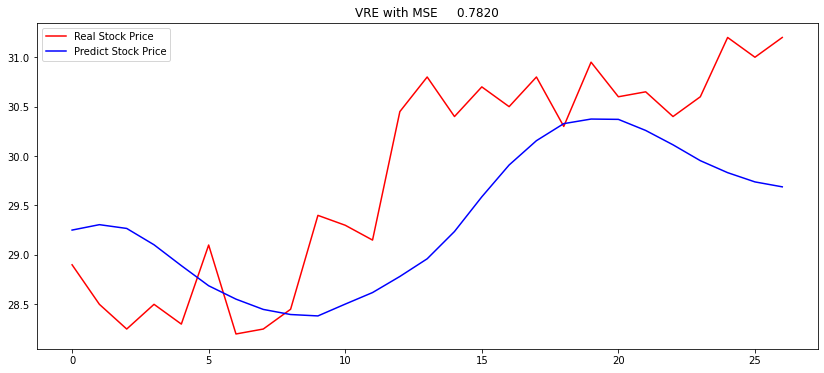

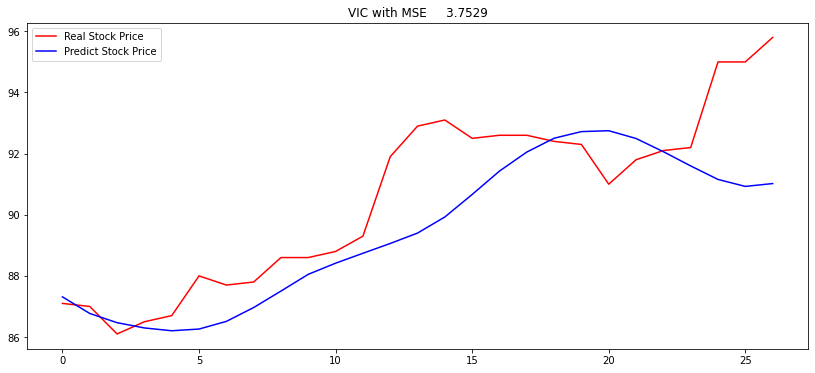

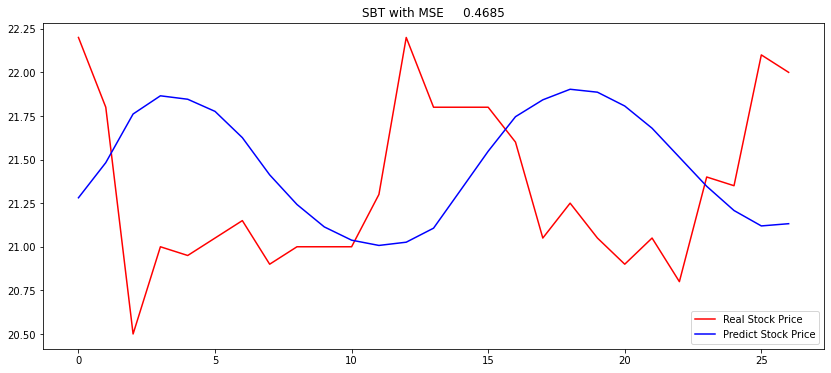

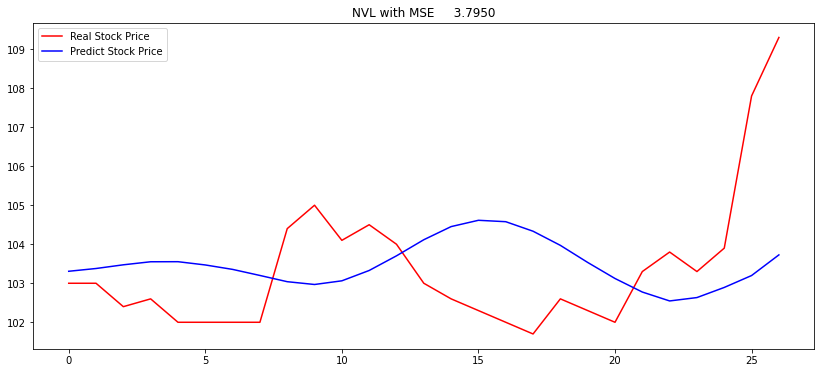

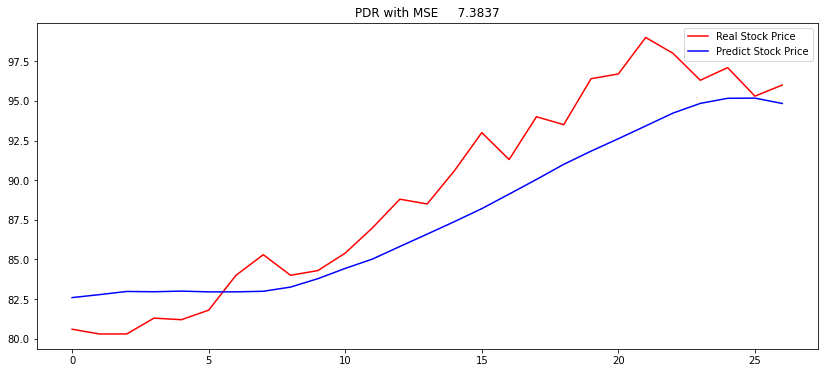

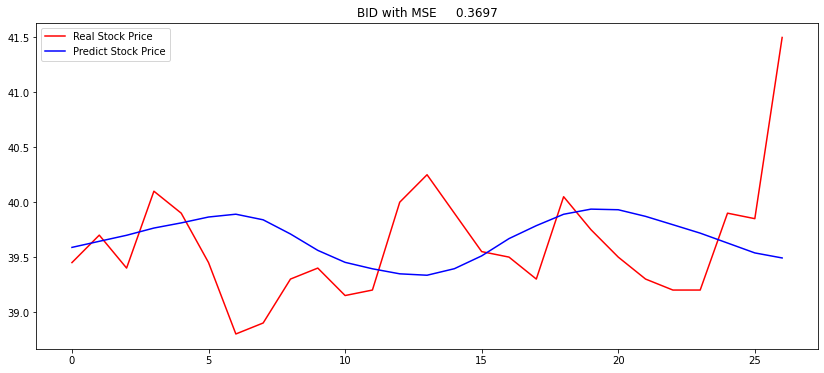

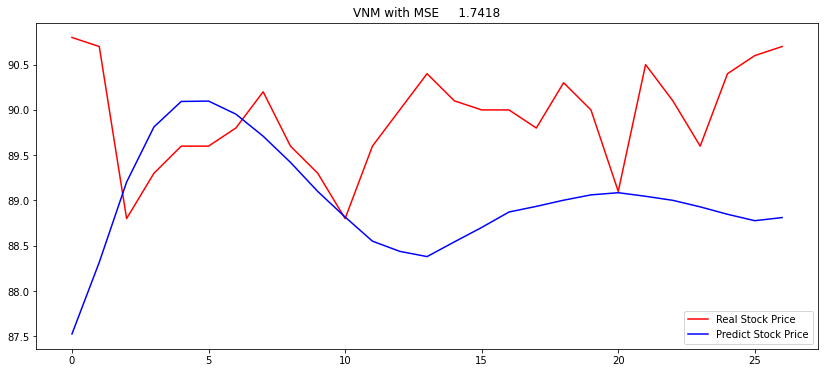

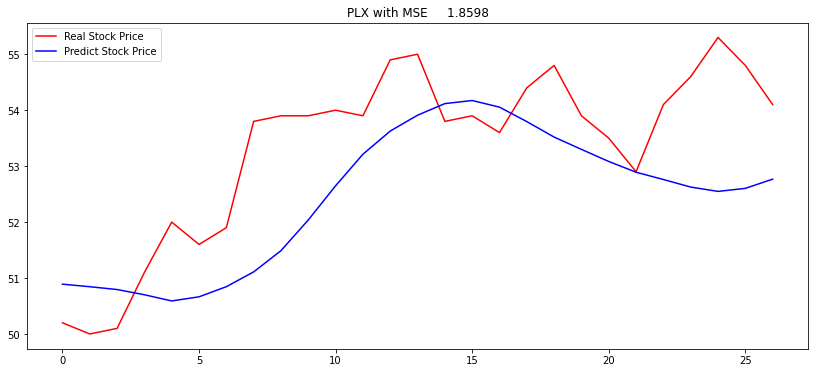

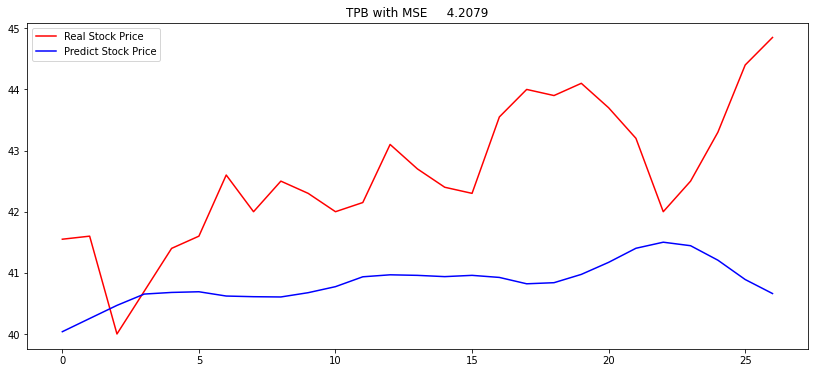

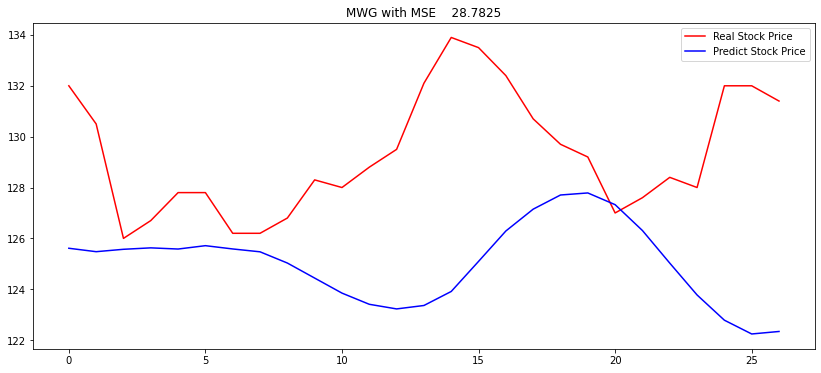

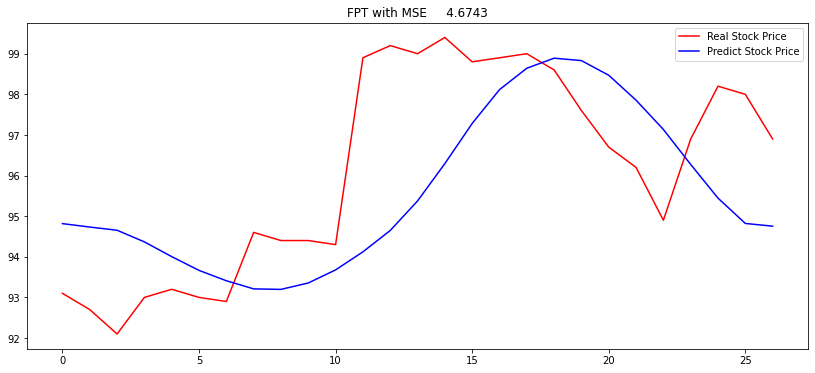

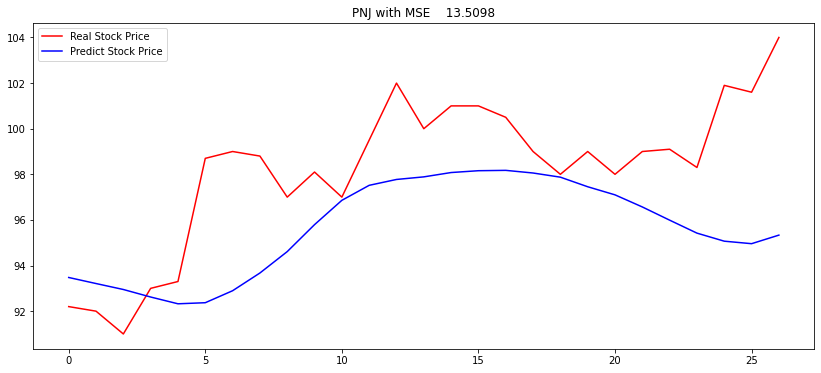

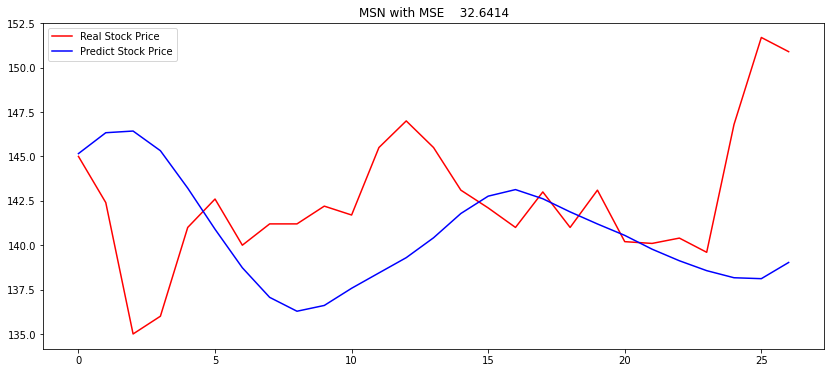

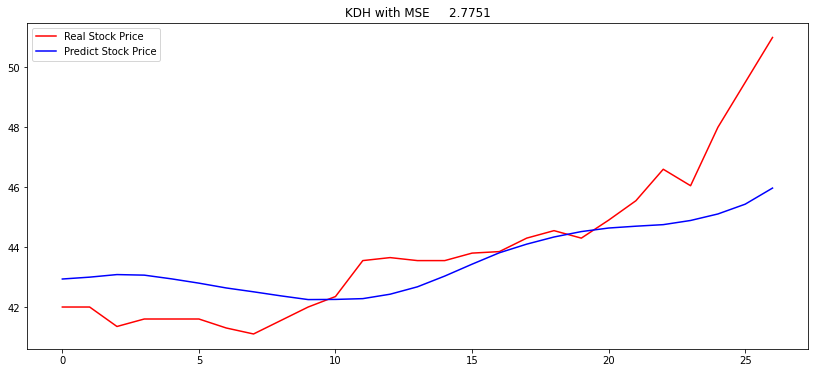

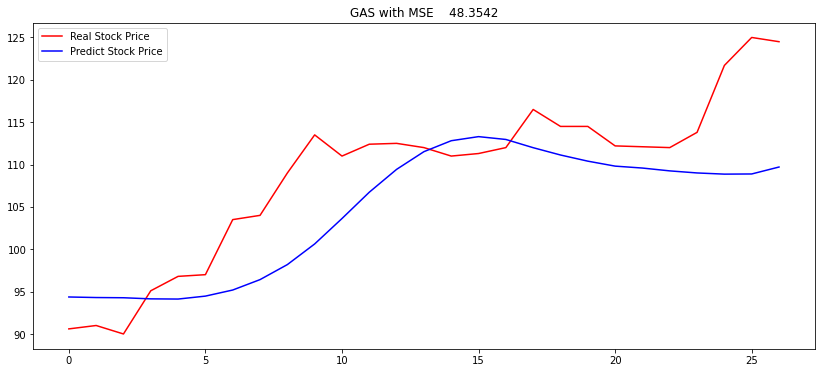

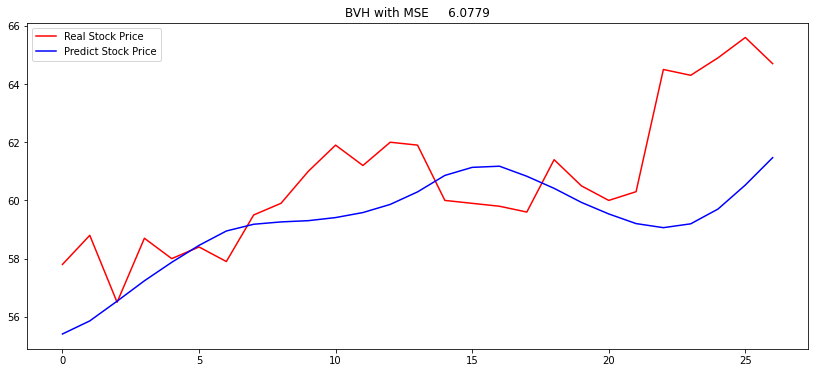

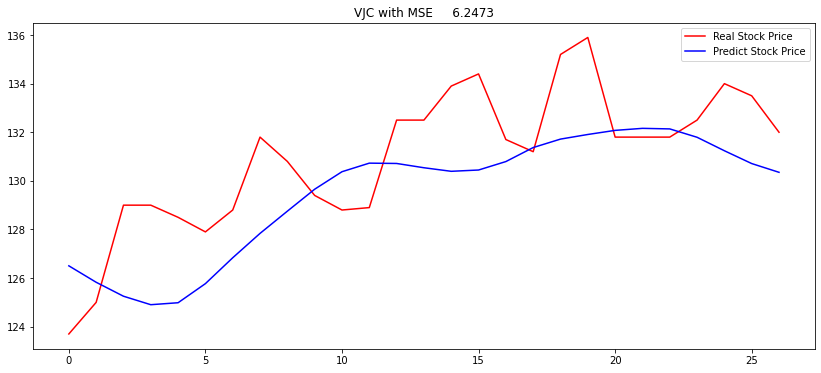

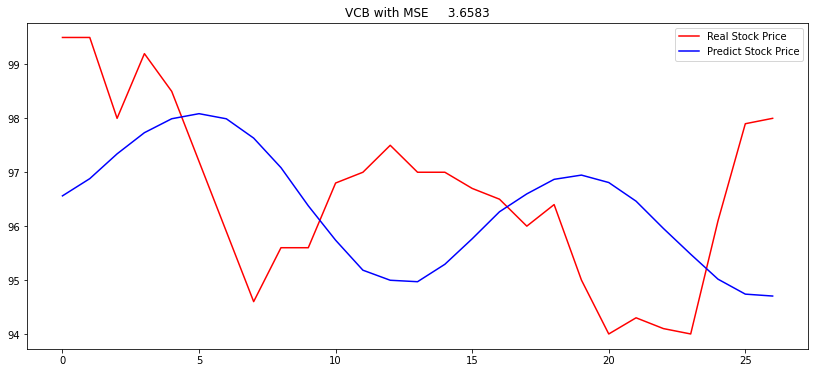

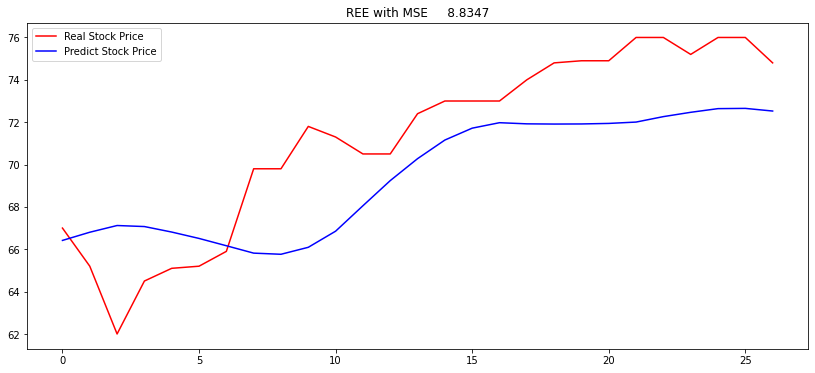

In [87]:
pred_result = {}
for i in symbol_list:
  y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
  y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"])) # scaling back from 0-1 to original

  MSE = mean_squared_error(y_true, y_pred)
  pred_result[i] = {}
  pred_result[i]["True"] = y_true
  pred_result[i]["Pred"] = y_pred

  plt.figure(figsize=(14,6))
  plt.title("{} with MSE {:10.4f}".format(i,MSE))
  plt.plot(y_true, color='red', label='Real Stock Price')
  plt.plot(y_pred, color='blue', label='Predict Stock Price')
  plt.legend(["Real Stock Price", "Predict Stock Price"])

# Xây dựng mô hình MLP

In [105]:
%%time
model = Sequential()
model.add(Dense(30, activation='relu', input_shape = (X_train.shape[1], 1) ))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting to the training set
for i in symbol_list:
  print("Fitting to", i)
  model.fit(trainset[i]["X"], trainset[i]["y"], batch_size=200)

Fitting to STB
1/1 [==============================] - 1s 823ms/step - loss: 0.2936
Fitting to SSI
1/1 [==============================] - 0s 24ms/step - loss: 0.2264
Fitting to TCB
1/1 [==============================] - 0s 14ms/step - loss: 0.2564
Fitting to VPB
1/1 [==============================] - 0s 12ms/step - loss: 0.2901
Fitting to HPG
1/1 [==============================] - 0s 9ms/step - loss: 0.1290
Fitting to MBB
1/1 [==============================] - 0s 10ms/step - loss: 0.1459
Fitting to POW
1/1 [==============================] - 0s 11ms/step - loss: 0.1197
Fitting to CTG
1/1 [==============================] - 0s 9ms/step - loss: 0.1444
Fitting to TCH
1/1 [==============================] - 0s 10ms/step - loss: 0.0995
Fitting to HDB
1/1 [==============================] - 0s 11ms/step - loss: 0.1482
Fitting to VHM
1/1 [==============================] - 0s 14ms/step - loss: 0.0993
Fitting to VRE
1/1 [==============================] - 0s 9ms/step - loss: 0.0871
Fitting to VIC
1/1

In [106]:
pred_result = {}
for i in symbol_list:
  y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
  y_pred = scaler[i].inverse_transform(model.predict(testset[i]["X"]))
  MSE = mean_squared_error(y_true, y_pred)
  pred_result[i] = {}
  pred_result[i]["True"] = y_true
  pred_result[i]["Pred"] = y_pred
  
  plt.figure(figsize=(14,6))
  plt.title("{} with MSE {:10.4f}".format(i,MSE))
  plt.plot(y_true, color='red', label='Real Stock Price')
  plt.plot(y_pred, color='blue', label='Predict Stock Price')
  plt.legend(["Real Stock Price", "Predict Stock Price"])

1/1 [==============================] - 0s 109ms/step


ValueError: ignored

# Xây dựng mô hình LSTM

In [75]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
for i in symbol_list:
  print("Fitting to", i)
  regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=10, batch_size=200)

Fitting to STB
Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.3890
Epoch 2/10
1/1 [==============================] - 0s 60ms/step - loss: 0.2447
Epoch 3/10
1/1 [==============================] - 0s 60ms/step - loss: 0.1392
Epoch 4/10
1/1 [==============================] - 0s 67ms/step - loss: 0.0479
Epoch 5/10
1/1 [==============================] - 0s 64ms/step - loss: 0.0507
Epoch 6/10
1/1 [==============================] - 0s 61ms/step - loss: 0.0588
Epoch 7/10
1/1 [==============================] - 0s 67ms/step - loss: 0.0406
Epoch 8/10
1/1 [==============================] - 0s 59ms/step - loss: 0.0496
Epoch 9/10
1/1 [==============================] - 0s 56ms/step - loss: 0.0404
Epoch 10/10
1/1 [==============================] - 0s 60ms/step - loss: 0.0512
Fitting to SSI
Epoch 1/10
1/1 [==============================] - 0s 60ms/step - loss: 0.0431
Epoch 2/10
1/1 [==============================] - 0s 57ms/step - loss: 0.0405
Epoch 3/10
1/1 [===================

In [70]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 14, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

# Predic trên mô hình LSTM

1/1 [==============================] - 0s 26ms/step


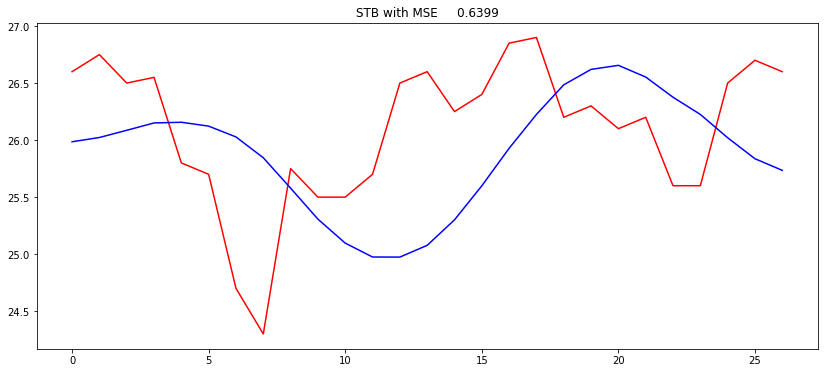

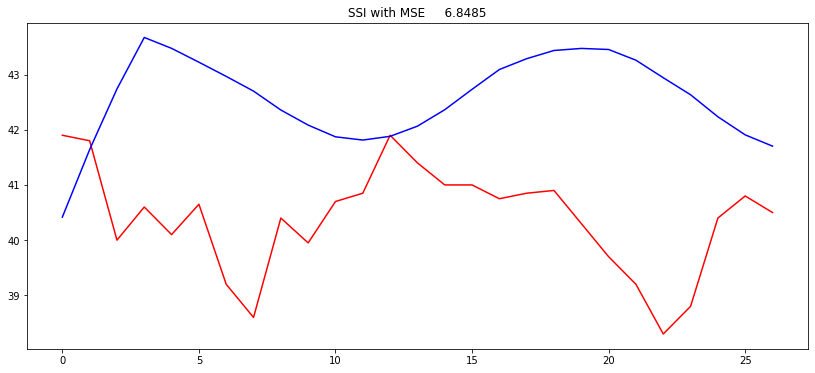

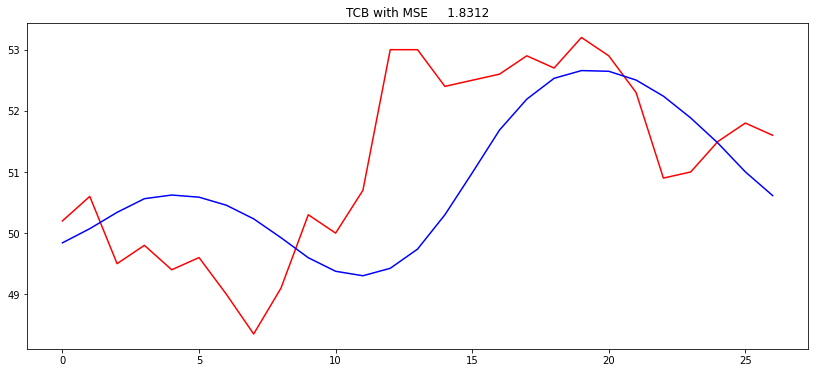

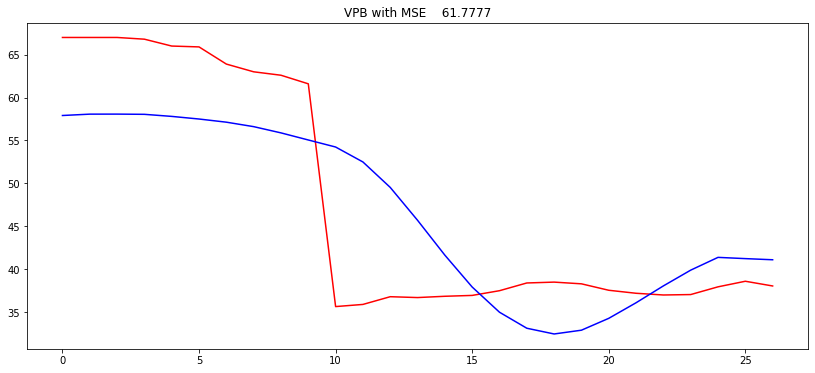

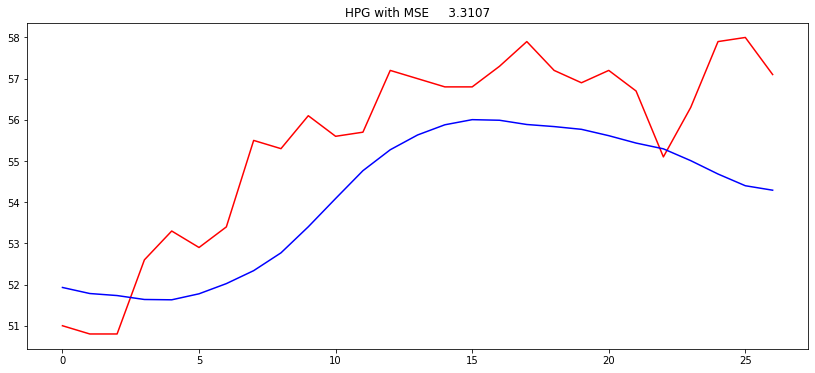

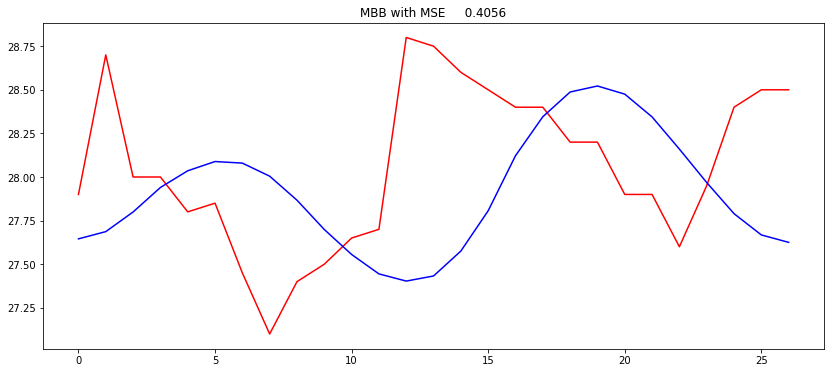

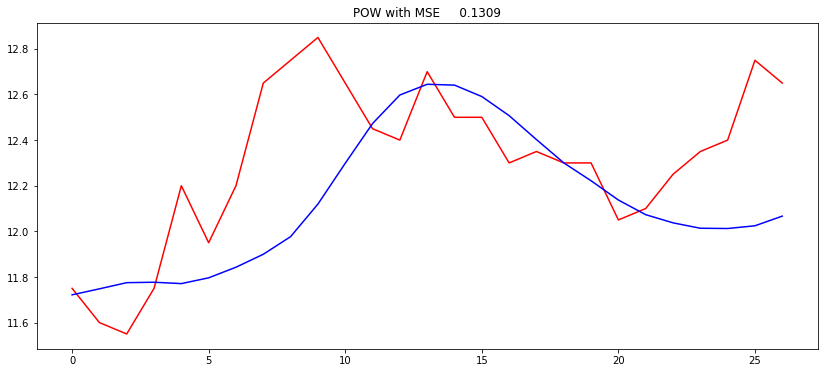

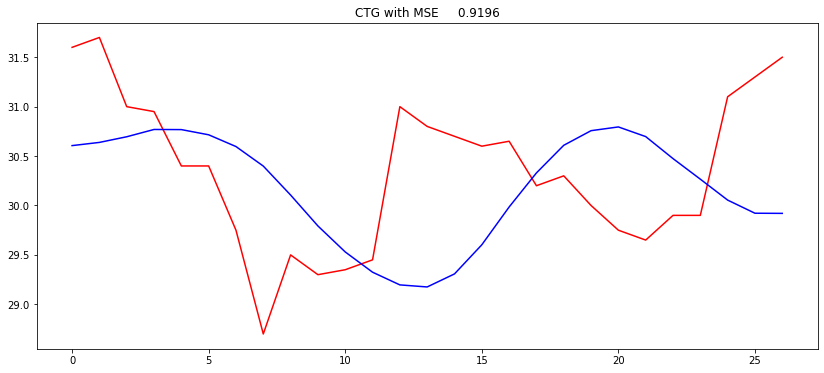

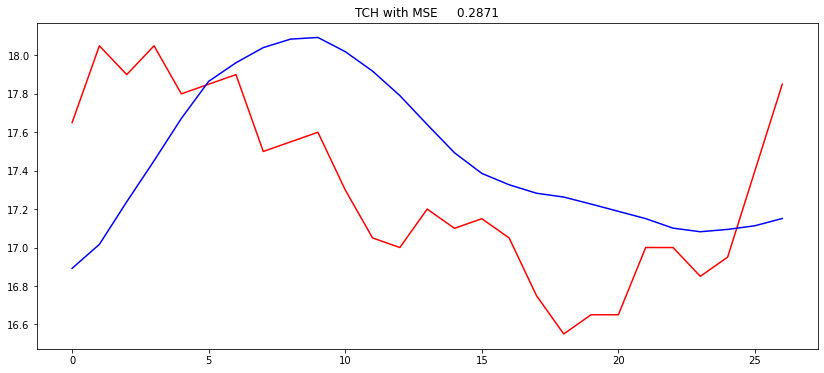

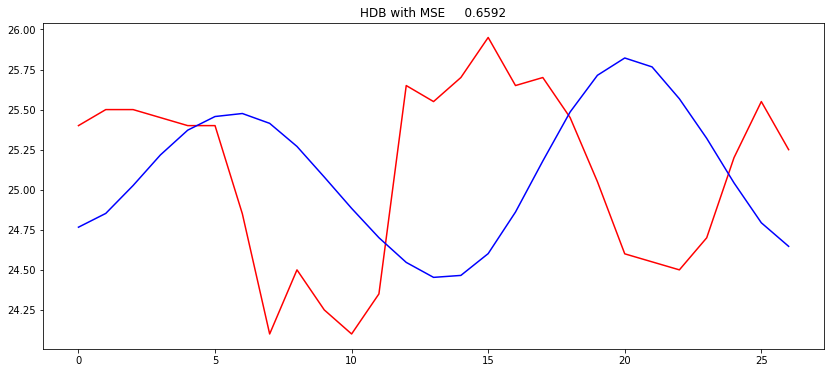

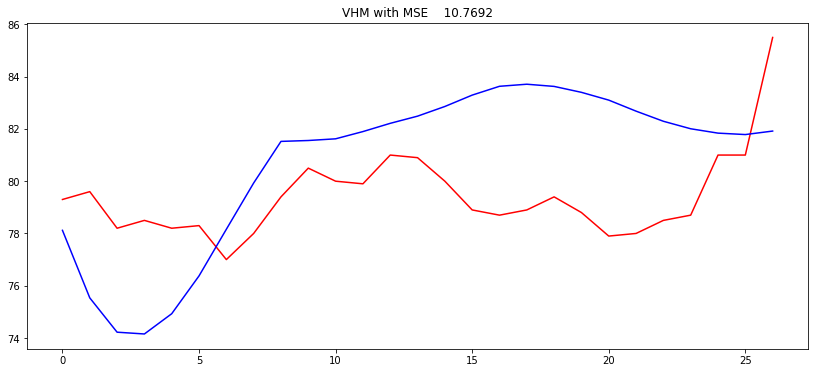

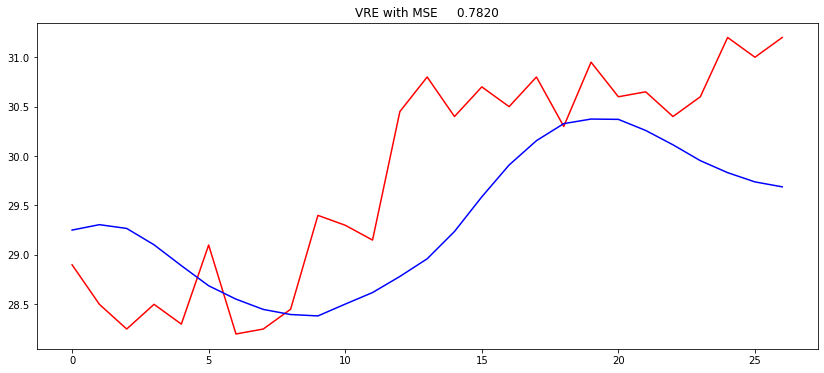

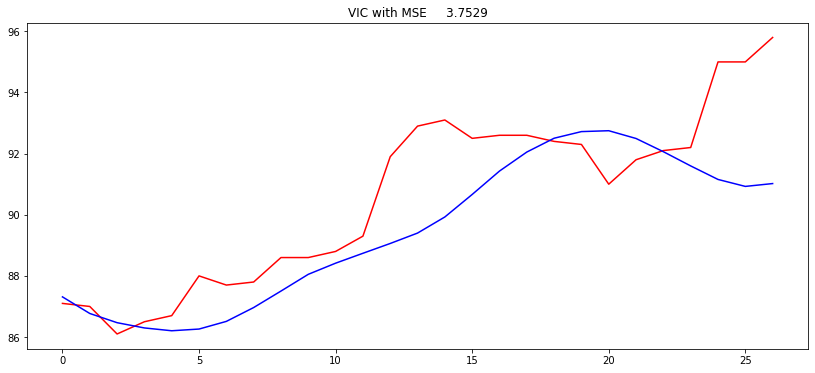

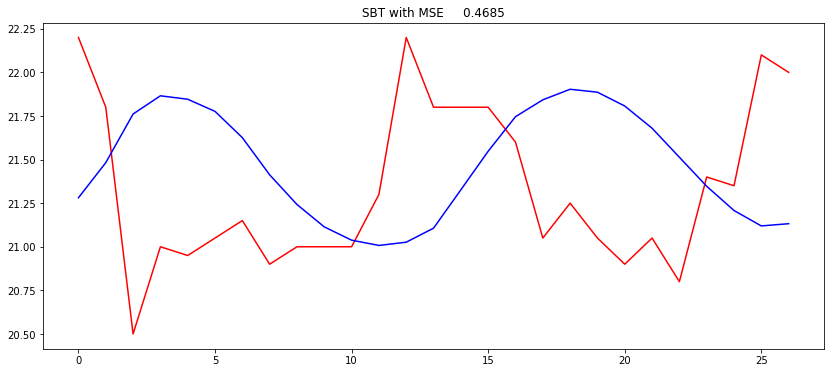

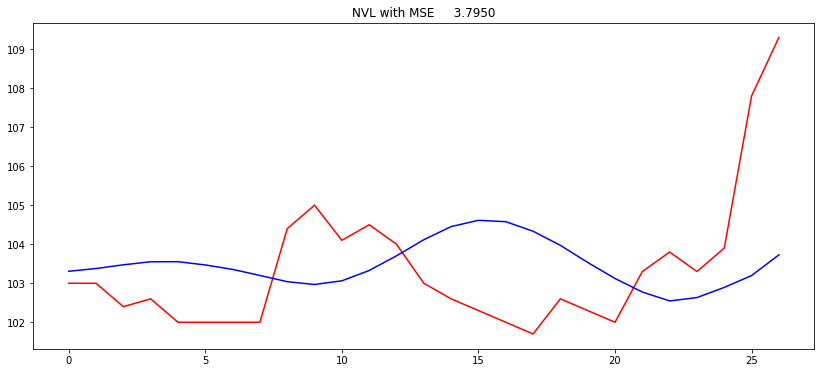

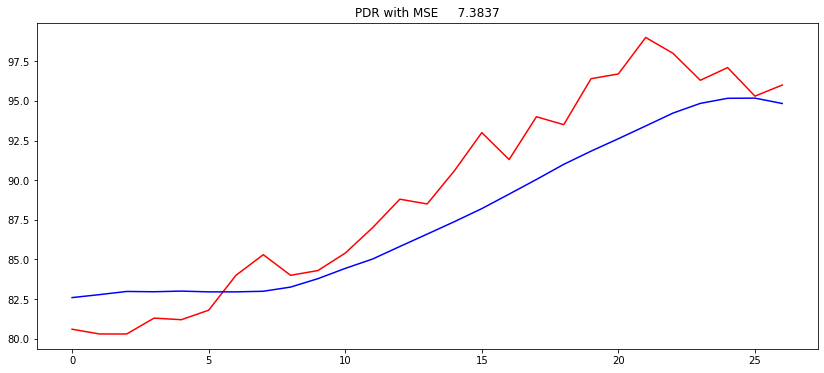

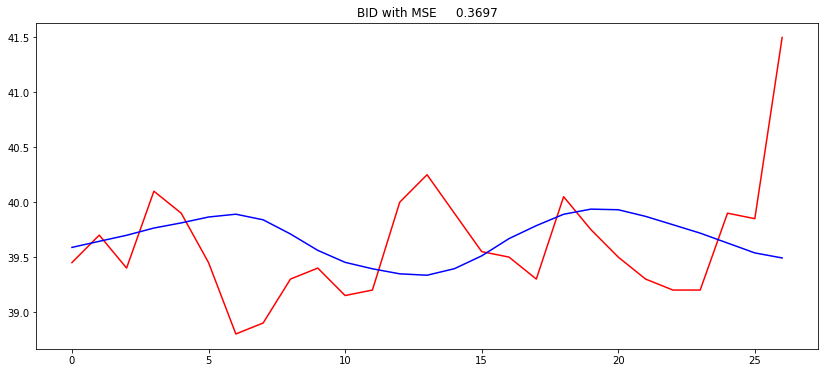

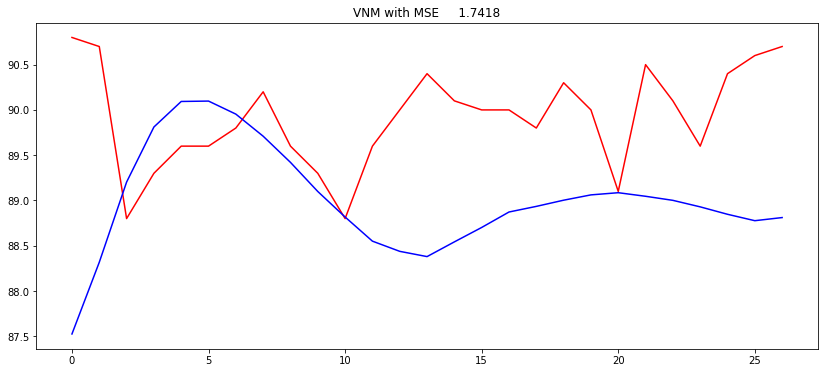

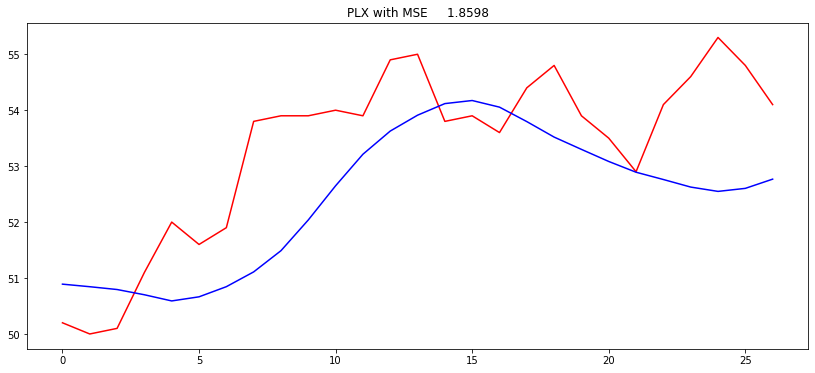

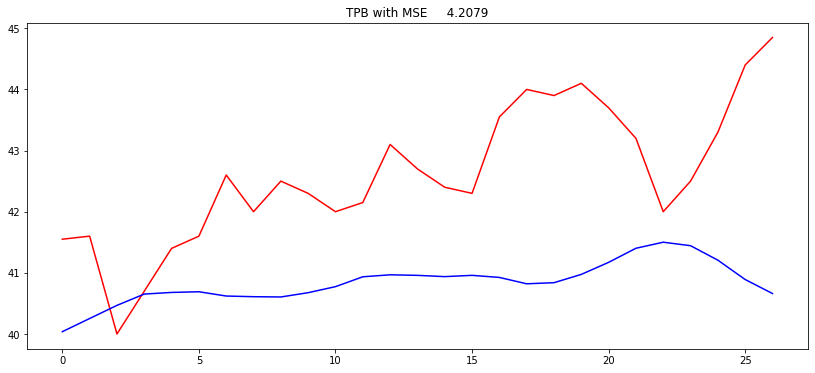

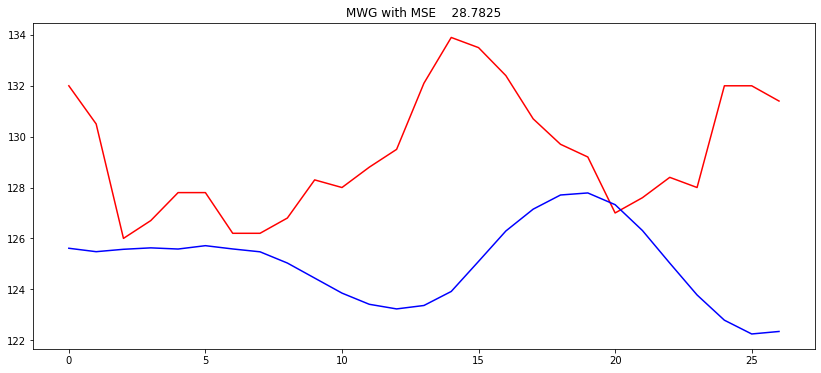

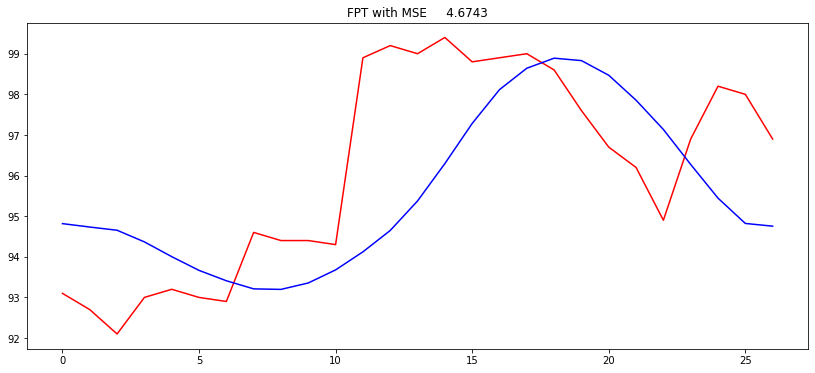

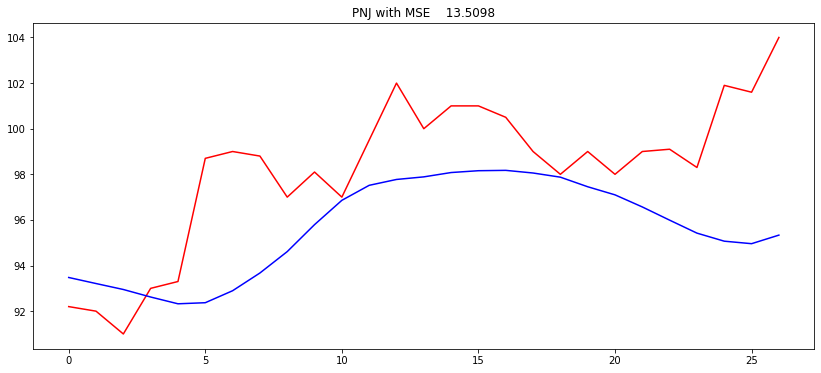

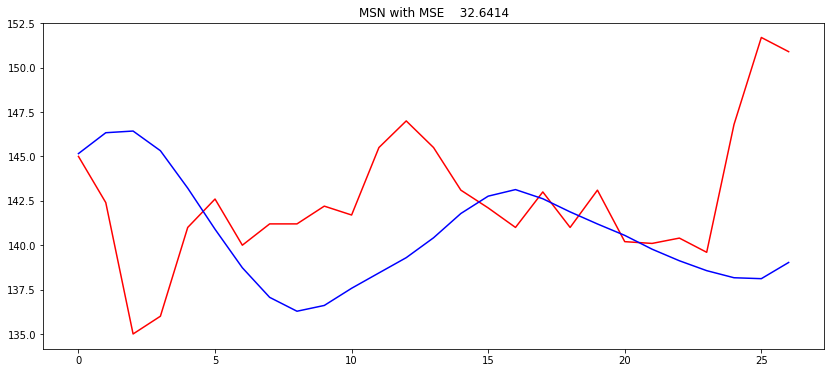

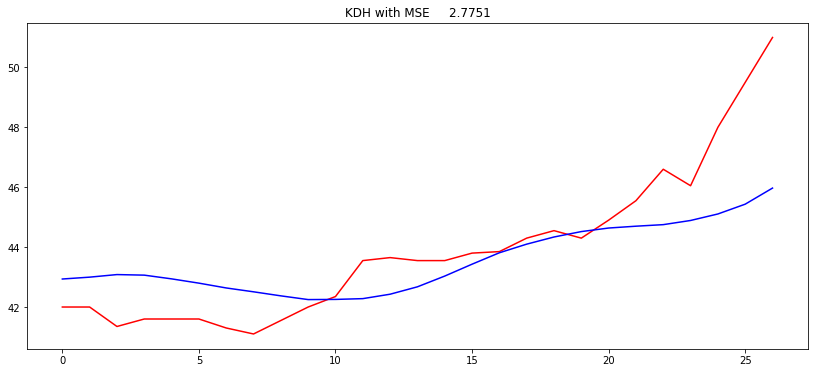

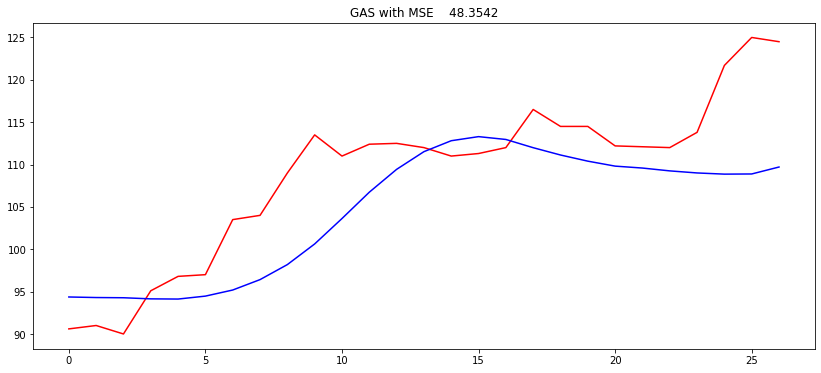

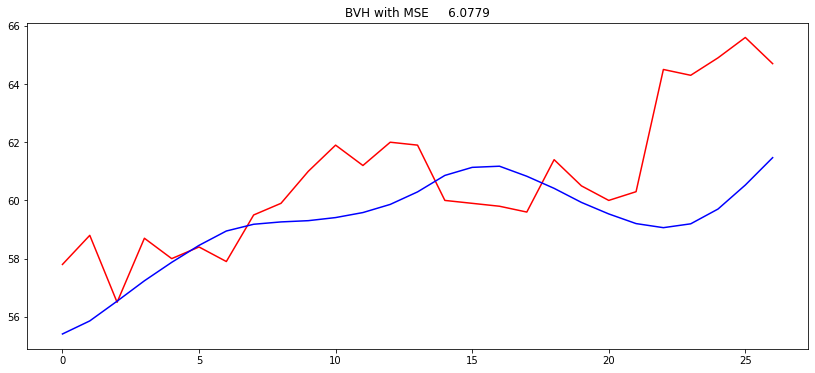

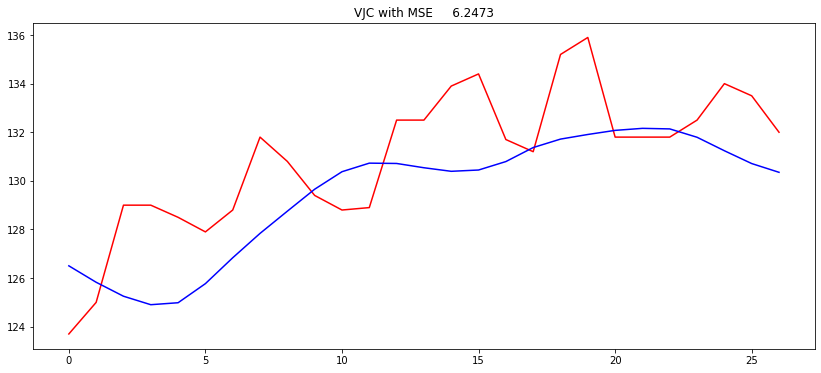

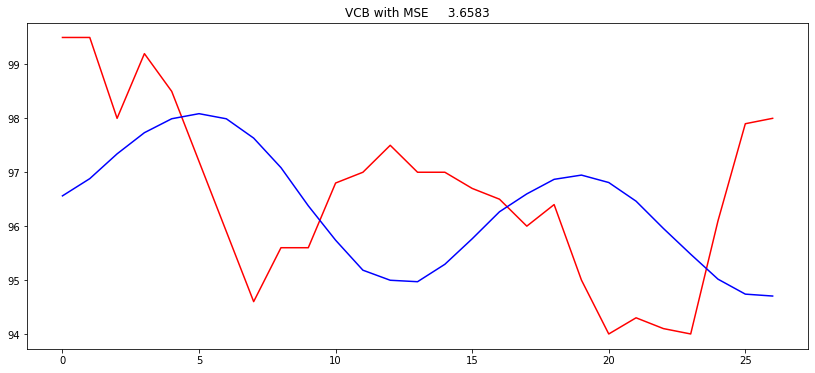

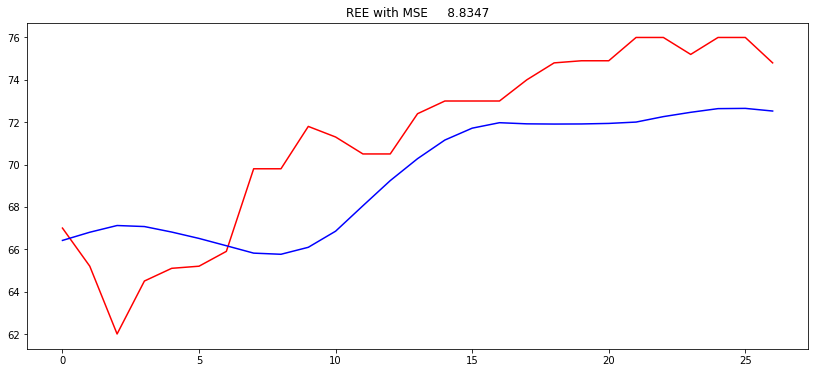

In [76]:
pred_result = {}
for i in symbol_list:
  y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
  y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))
  MSE = mean_squared_error(y_true, y_pred)
  pred_result[i] = {}
  pred_result[i]["True"] = y_true
  pred_result[i]["Pred"] = y_pred
  
  plt.figure(figsize=(14,6))
  plt.title("{} with MSE {:10.4f}".format(i,MSE))
  plt.plot(y_true, color='red', label='Real Stock Price')
  plt.plot(y_pred, color='blue', label='Predict Stock Price')
  plt.legend(["Real Stock Price", "Predict Stock Price"])